In [1]:
import json
import numpy as np
node_dict = {}
with open("san_francisco_censustracts.json") as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            print("Stanford", feature["properties"]["MOVEMENT_ID"])
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            print("UCSC", feature["properties"]["MOVEMENT_ID"])
        data = feature["geometry"]["coordinates"][0][0]
        c1= []
        c2 = []
        for d in data:
            c1.append(d[0])
            c2.append(d[1])
        node_dict[int(feature["properties"]["MOVEMENT_ID"])] = [np.mean(c1), np.mean(c2)]

('UCSC', u'1968')
('Stanford', u'2607')


In [2]:
print(node_dict[1968])
print(node_dict[2607])

[-122.0645618108108, 36.974168810810809]
[-122.17598222222222, 37.429685888888891]


In [3]:
from scipy.spatial import Delaunay
import numpy as np
# print(node_dict.values())

In [4]:
# stanford_nodes = stanford_nodes[0][0]
# ucsc_nodes = ucsc_nodes[0][0]

# nodes = []
# for node in stanford_nodes:
#     nodes.append(node)
# for node in ucsc_nodes:
#     nodes.append(node)
points = np.array(list(node_dict.values()))

In [5]:
print(len(points))

2710


In [6]:
print(points[1967])
print(points[2606])

[-122.06456181   36.97416881]
[-122.17598222   37.42968589]


In [7]:
tri = Delaunay(points)

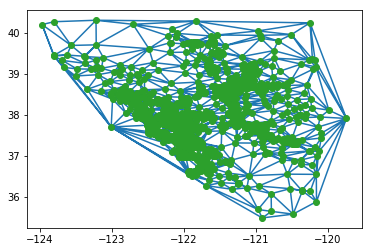

In [8]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [9]:
print(tri.vertices[1])

[204 247 629]


In [10]:
edges = set() 
for n in range(tri.nsimplex): 
    edge = ([tri.vertices[n,0], tri.vertices[n,1]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,0], tri.vertices[n,2]]) 
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
    edge = ([tri.vertices[n,1], tri.vertices[n,2]])     
    if edge[0] in node_dict and edge[1] in node_dict:
        edges.add((edge[0], edge[1])) 
# print(edges)

In [11]:
import csv
speed_dict = {}
with open('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    next(csvReader, None)
    for row in csvReader:
        if row[2] == "12":
            keypair = (int(row[0]), int(row[1]))
            if keypair in speed_dict:
                speed_dict[keypair].append(float(row[3]))
            speed_dict[keypair] = [float(row[3])]


In [12]:
for key, value in zip(speed_dict.keys(), speed_dict.values()):
    speed_dict[key] = np.mean(value)

In [13]:
traffic_flows = {}
filtered_edges = []
filtered_points = []
for i in range(len(edges)):
    edge = list(edges)[i]
#     start = points[edge[0]]
#     end = points[edge[1]]
    start = node_dict[edge[0]]
    end = node_dict[edge[1]]
    key1 = (edge[0],edge[1])
    if key1 in speed_dict:
        filtered_edges.append(edge)
        filtered_points.append(node_dict[edge[0]])
        filtered_points.append(node_dict[edge[1]])
        road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
        speed = road_len/speed_dict[key1]
#         road_len = np.sqrt(np.power(end[1] - end[0], 2) + np.power(start[1] - start[0], 2)) * 69.0
    #     traffic_flow = 4*(road_len / (0.003 + (60 * 2)/3600.0))
        traffic_flow = speed * (1/(0.003 + (speed * 2)/3600.0))
        traffic_flows[edge] = traffic_flow
        print("For road: ", edge, " the traffic flow is: ", traffic_flow)



('For road: ', (1617, 1608), ' the traffic flow is: ', 1437.7735434919221)
('For road: ', (1586, 1098), ' the traffic flow is: ', 1342.9695511837106)
('For road: ', (1932, 1934), ' the traffic flow is: ', 1480.3668818107674)
('For road: ', (1558, 322), ' the traffic flow is: ', 932.06601000792705)
('For road: ', (2146, 547), ' the traffic flow is: ', 1395.5905921536191)
('For road: ', (1064, 1538), ' the traffic flow is: ', 1639.8951729821317)
('For road: ', (2435, 1081), ' the traffic flow is: ', 1341.7787576768596)
('For road: ', (1755, 2247), ' the traffic flow is: ', 1692.5268597372012)
('For road: ', (1245, 642), ' the traffic flow is: ', 1553.2559503897339)
('For road: ', (1807, 1805), ' the traffic flow is: ', 1528.6973578853958)
('For road: ', (2422, 1584), ' the traffic flow is: ', 1522.6739321170137)
('For road: ', (2420, 2213), ' the traffic flow is: ', 1060.5383858602736)
('For road: ', (660, 2613), ' the traffic flow is: ', 1119.1225061059447)
('For road: ', (2225, 2519), 

('For road: ', (1756, 394), ' the traffic flow is: ', 1293.9830270011803)
('For road: ', (470, 1551), ' the traffic flow is: ', 1509.7502201714162)
('For road: ', (1533, 1531), ' the traffic flow is: ', 1553.1315145815438)
('For road: ', (1329, 1932), ' the traffic flow is: ', 1652.5338119052853)
('For road: ', (1685, 2307), ' the traffic flow is: ', 1090.2736684321892)
('For road: ', (2224, 808), ' the traffic flow is: ', 1288.5345814798559)
('For road: ', (764, 2062), ' the traffic flow is: ', 1643.1058113907441)
('For road: ', (1546, 624), ' the traffic flow is: ', 1099.8769555749395)
('For road: ', (1914, 720), ' the traffic flow is: ', 1480.2072536462665)
('For road: ', (216, 103), ' the traffic flow is: ', 1650.2226881881968)
('For road: ', (1407, 1406), ' the traffic flow is: ', 1357.5122536276056)
('For road: ', (641, 1689), ' the traffic flow is: ', 1506.2771185690258)
('For road: ', (1526, 2434), ' the traffic flow is: ', 1537.9204349708973)
('For road: ', (81, 650), ' the tr

('For road: ', (210, 662), ' the traffic flow is: ', 1341.1836760310753)
('For road: ', (859, 1295), ' the traffic flow is: ', 1467.1923975399973)
('For road: ', (1028, 1631), ' the traffic flow is: ', 1241.8953906742943)
('For road: ', (593, 1063), ' the traffic flow is: ', 1526.9617117189389)
('For road: ', (2193, 1013), ' the traffic flow is: ', 1728.4946075568107)
('For road: ', (1386, 1875), ' the traffic flow is: ', 1591.1109074144665)
('For road: ', (1527, 1035), ' the traffic flow is: ', 1301.7774734880327)
('For road: ', (315, 268), ' the traffic flow is: ', 875.99413742341346)
('For road: ', (219, 217), ' the traffic flow is: ', 1655.4571783173683)
('For road: ', (1530, 1535), ' the traffic flow is: ', 1375.2704367721296)
('For road: ', (687, 1906), ' the traffic flow is: ', 1500.1301726841473)
('For road: ', (2236, 472), ' the traffic flow is: ', 1403.2403280600759)
('For road: ', (2694, 2322), ' the traffic flow is: ', 1212.5438121086797)
('For road: ', (2469, 2059), ' the 

('For road: ', (610, 321), ' the traffic flow is: ', 1586.1527334742916)
('For road: ', (277, 382), ' the traffic flow is: ', 1152.4256325157037)
('For road: ', (2363, 1443), ' the traffic flow is: ', 980.42558788860242)
('For road: ', (1535, 1530), ' the traffic flow is: ', 1408.5247173255004)
('For road: ', (152, 1911), ' the traffic flow is: ', 1344.3809799572243)
('For road: ', (2482, 2484), ' the traffic flow is: ', 1182.9622267341374)
('For road: ', (2434, 1528), ' the traffic flow is: ', 1425.4207859753162)
('For road: ', (39, 2540), ' the traffic flow is: ', 1632.4245228857112)
('For road: ', (1633, 1028), ' the traffic flow is: ', 1517.8526144787002)
('For road: ', (2375, 1933), ' the traffic flow is: ', 1428.8630224590402)
('For road: ', (2528, 1804), ' the traffic flow is: ', 1230.6050218172525)
('For road: ', (1498, 1533), ' the traffic flow is: ', 1310.9401460581037)
('For road: ', (1275, 866), ' the traffic flow is: ', 1318.3585881115052)
('For road: ', (1450, 2502), ' th

('For road: ', (1106, 60), ' the traffic flow is: ', 1657.5963860932279)
('For road: ', (1656, 1655), ' the traffic flow is: ', 1503.9877761061464)


In [14]:
import networkx as nx 
graph1 = nx.Graph(list(edges)) 
graph2 = nx.Graph(list(filtered_edges)) 
# print(graph.edges()) 

# largest_g1 = max(nx.connected_component_subgraphs(graph1), key=len)
# graphs_1 = list(nx.connected_component_subgraphs(graph1))
# print(len(graphs_1))
# graphs_2 = list(nx.connected_component_subgraphs(graph2))
# print(len(graphs_2))
largest_g2 = max(nx.connected_component_subgraphs(graph2), key=len)

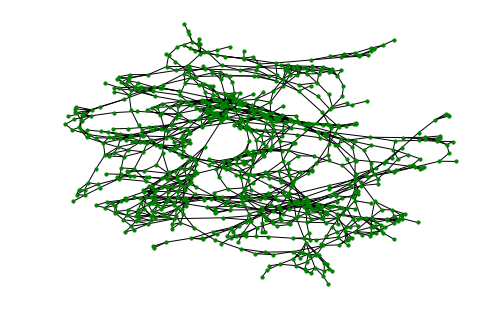

In [15]:
import matplotlib.pyplot as plt 
# pointIDXY = dict(zip(range(len(points)), points)) 
# pointIDXY = dict(zip(range(len(largest_g1.nodes)), largest_g1.nodes))
# nx.draw(graph1,node_size = 10, node_color = "blue") 
# plt.show() 

# pointIDXY = dict(zip(range(len(filtered_points)), filtered_points)) 
nx.draw(largest_g2,node_size = 10, node_color = "green") 
plt.show()

In [16]:
nx.set_edge_attributes(largest_g2, traffic_flows, 'capacity')

In [17]:
print(len(edges))

10810


In [18]:
for (u,v) in largest_g2.edges:
    print(u,v)
    print(largest_g2[u][v])
    if v!=643: break

(8, 643)
{'capacity': 882.61694497818689}
(20, 905)
{'capacity': 1676.4898824012173}


#### Q13 Calculate the Max Flow & Calculate the Number of Edge-Disjoint Paths


In [19]:
stanford_id = 2606
UCSC_id = 1967
print(nx.maximum_flow_value(largest_g2, stanford_id, UCSC_id))

from networkx.algorithms.connectivity.disjoint_paths import edge_disjoint_paths
print(len(list(edge_disjoint_paths(largest_g2, stanford_id, UCSC_id))))

NetworkXError: node 1967 not in graph

#### Q14 Defoliate the Graph

In [ ]:
threshold = 20
ebunch = []
for (u,v) in largest_g2.edges():
    if largest_g2[u][v]['weight'] < threshold:
        ebunch.append((u,v))
        
largest_g2.remove_edges_from(ebunch)
# largest_g2.__dict__
# plot on real map coordinates and check bridges location

#### Q15: triangle inequality